## Titanic Exploratory Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('assets/titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 1 - Understanding the data

In [3]:
# checking the dimensionality of data
print(f'There is {df.shape[0]} rows and {df.shape[1]} columns.')

There is 1310 rows and 14 columns.


In [4]:
# getting basic information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [5]:
# checking basic statistical summary
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
# checking null values
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [7]:
total_null = df.isnull().sum()
total_len = len(df)
percentage = (total_null/total_len * 100).sort_values(ascending=False)
print(percentage)

body         90.763359
cabin        77.480916
boat         62.900763
home.dest    43.129771
age          20.152672
embarked      0.229008
fare          0.152672
pclass        0.076336
survived      0.076336
name          0.076336
sex           0.076336
sibsp         0.076336
parch         0.076336
ticket        0.076336
dtype: float64


So, this null summary show that there a lot of feature which contain higher percentage of missing value which we will deal in our data clean and preprocessing method.

After seeing the basic summary of data we know that our data have 1310 rows with 14 feature and all of our data is in well formatted foram except null values which we will figure it out latter. So with the basic knowledge of data we start our data exploration where i used three method:
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

This steps will give us the proper information of our data so that we can make the insightfull decisions.

Let's Start!

### 2. Univariate Analysis

In univariate analysis we analysis the each feature separately and check that what each feature wanna tell us and checking the data distribution how values are far from each other.

#### 2.1 PCLASS

PCLASS stand for passenger class like 1 stand for 1st class ticket holders, 2 stand for 2nd class ticket holders and 3 stand for 3rd class ticket holders.

In [8]:
df.pclass.value_counts()

pclass
3.0    709
1.0    323
2.0    277
Name: count, dtype: int64

<Axes: xlabel='pclass', ylabel='count'>

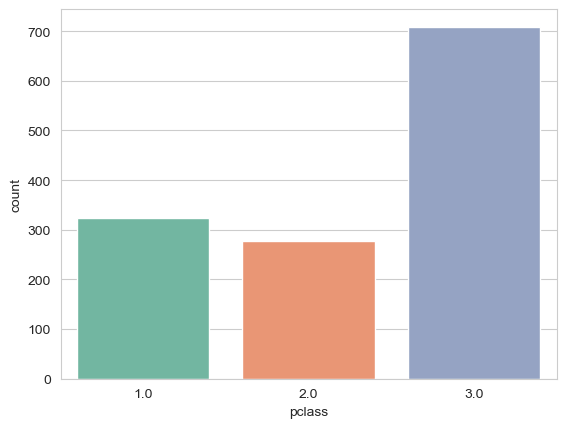

In [9]:
sns.countplot(x=df.pclass, palette='Set2')

According to this chart the majority lay in 3rd class ticket holders means many people which are on board on titanic was middle class folks.

#### 2.2 SURVIVED

SURVIVED tell how many passenger was alived or not. 0 stand for no and 1 stand for yes

In [10]:
df.survived.value_counts()

survived
0.0    809
1.0    500
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

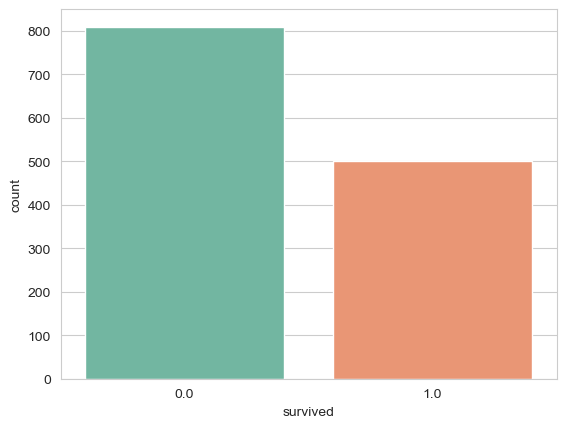

In [11]:
sns.countplot(x=df.survived, palette='Set2')

According to this chart many people was died on the titanic. That's why this is the most heartbroken accident of the 1990's.

#### 2.3 NAME

In [12]:
df.name.value_counts()

name
Connolly, Miss. Kate                                                                  2
Kelly, Mr. James                                                                      2
Allen, Miss. Elisabeth Walton                                                         1
Ilmakangas, Miss. Ida Livija                                                          1
Ilieff, Mr. Ylio                                                                      1
Ibrahim Shawah, Mr. Yousseff                                                          1
Hyman, Mr. Abraham                                                                    1
Humblen, Mr. Adolf Mathias Nicolai Olsen                                              1
Howard, Miss. May Elizabeth                                                           1
Horgan, Mr. John                                                                      1
Honkanen, Miss. Eliina                                                                1
Ivanoff, Mr. Kanio         

In [13]:
names = df.name.dropna()

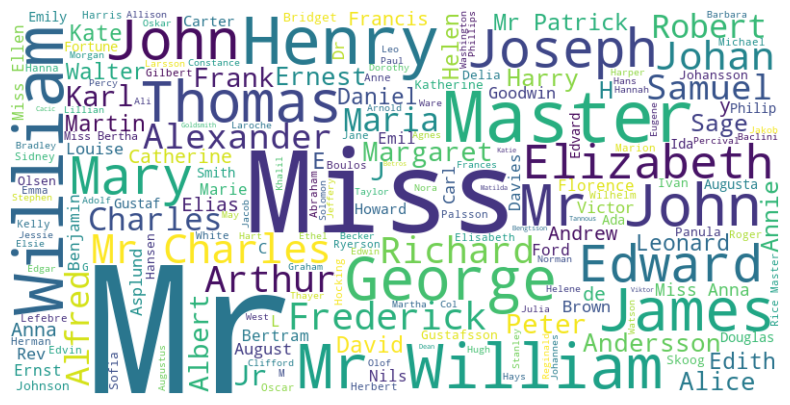

In [14]:
from wordcloud import WordCloud

names = df.name.dropna()

# Convert Series to a single string
text = ' '.join(names)

# Generate word cloud
text_rep = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(text_rep, interpolation='bilinear')
plt.axis('off')
plt.show()

This visualization represent that the mostly are males in the ship let's confirm it with our gender feature.

#### 2.4 SEX

In [15]:
df.sex.value_counts()

sex
male      843
female    466
Name: count, dtype: int64

As you can see males are more than female

<Axes: xlabel='sex', ylabel='count'>

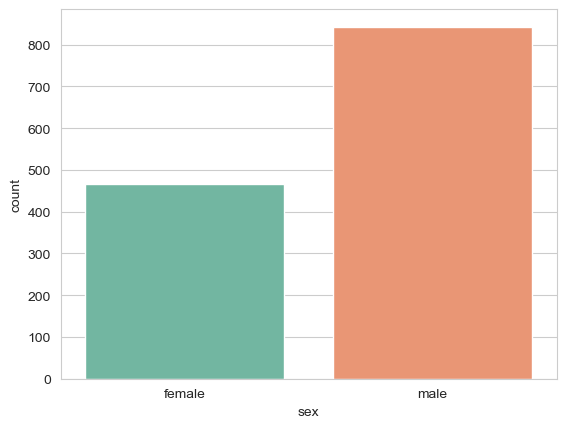

In [16]:
sns.countplot(x=df.sex, palette='Set2')

#### 2.5 AGE

In [17]:
df.age.value_counts()

age
24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
25.0000    34
28.0000    32
36.0000    31
26.0000    30
29.0000    30
27.0000    30
19.0000    29
23.0000    26
32.0000    24
31.0000    23
20.0000    23
35.0000    23
33.0000    21
45.0000    21
17.0000    20
39.0000    20
16.0000    19
42.0000    18
40.0000    18
34.0000    16
50.0000    15
38.0000    14
47.0000    14
48.0000    14
2.0000     12
41.0000    11
1.0000     10
9.0000     10
4.0000     10
54.0000    10
44.0000    10
49.0000     9
37.0000     9
43.0000     9
14.0000     8
55.0000     8
51.0000     8
3.0000      7
60.0000     7
8.0000      6
6.0000      6
15.0000     6
52.0000     6
46.0000     6
58.0000     6
64.0000     5
13.0000     5
61.0000     5
5.0000      5
57.0000     5
62.0000     5
56.0000     4
32.5000     4
63.0000     4
53.0000     4
7.0000      4
10.0000     4
11.0000     4
40.5000     3
59.0000     3
0.7500      3
0.8333      3
18.5000     3
12.0000     3
28.5000     3
65.0000     3
34

c:\Users\Ali Abdullah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

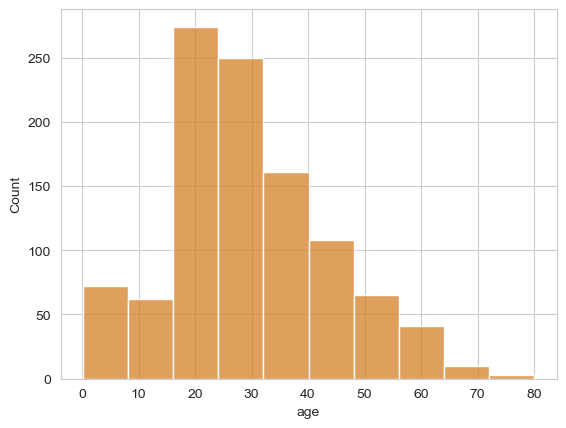

In [18]:
sns.histplot(x=df.age, bins=10, color='#d68127')

<Axes: xlabel='age'>

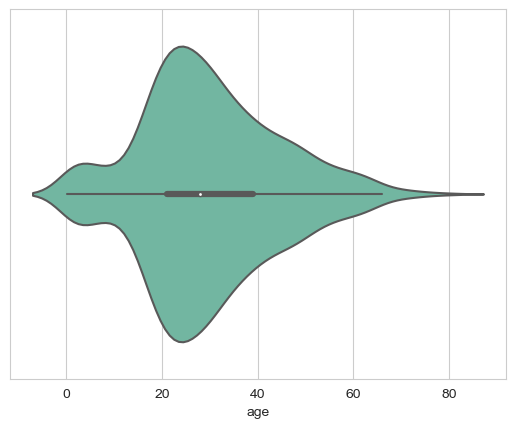

In [19]:
sns.violinplot(x='age', data=df, palette='Set2')

Mostly people are on titanic was young because the highest rate of people ages are 24.

#### 2.6 SIBSP

SIBSP represent the # of siblings and spouses which are aboard on titanic. SIB stand for siblings and SP stand for spouses.

In [20]:
df.sibsp.value_counts()

sibsp
0.0    891
1.0    319
2.0     42
4.0     22
3.0     20
8.0      9
5.0      6
Name: count, dtype: int64

<Axes: xlabel='sibsp', ylabel='count'>

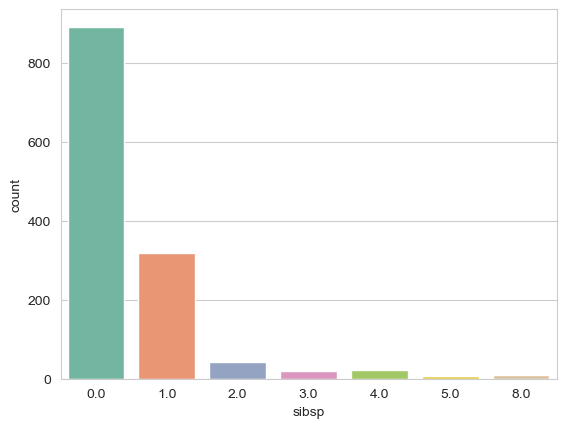

In [21]:
sns.countplot(x=df.sibsp, palette='Set2')

Mostly people travel alone on the titanic. 

#### 2.7 PARCH

PARCH describe the number of parents and children which are aboard on the titanic. PAR stand for parents and CH stand for childs.

In [22]:
df.parch.value_counts()

parch
0.0    1002
1.0     170
2.0     113
3.0       8
4.0       6
5.0       6
6.0       2
9.0       2
Name: count, dtype: int64

<Axes: xlabel='parch', ylabel='count'>

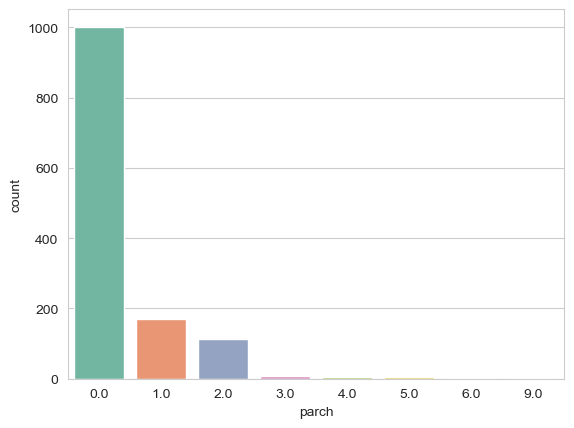

In [23]:
sns.countplot(x=df.parch, palette='Set2')

#### 2.8 TICKET

In [24]:
df.ticket.value_counts()

ticket
CA. 2343              11
1601                   8
CA 2144                8
PC 17608               7
347077                 7
347082                 7
3101295                7
S.O.C. 14879           7
113781                 6
19950                  6
382652                 6
347088                 6
PC 17757               5
349909                 5
16966                  5
4133                   5
220845                 5
113503                 5
W./C. 6608             5
PC 17755               4
113760                 4
SC/Paris 2123          4
W./C. 6607             4
LINE                   4
24160                  4
C.A. 33112             4
12749                  4
230136                 4
17421                  4
2666                   4
PC 17760               4
C.A. 34651             4
PC 17483               4
C.A. 2315              4
36928                  4
A/5. 851               3
367226                 3
S.C./PARIS 2079        3
230080                 3
PC 17572          

In this feature there is no much distribution so we can't visualize it.

#### 2.9 FARE

In [25]:
df.fare.value_counts()

fare
8.0500      60
13.0000     59
7.7500      55
26.0000     50
7.8958      49
10.5000     35
7.7750      26
7.2292      24
7.9250      23
26.5500     22
7.2250      21
7.8542      21
8.6625      21
7.2500      18
0.0000      17
21.0000     14
16.1000     12
9.5000      12
69.5500     11
27.7208     11
14.5000     11
7.7958      10
7.8792      10
15.5000     10
14.4542     10
15.2458      9
7.0500       9
24.1500      9
52.0000      8
46.9000      8
56.4958      8
7.5500       8
262.3750     7
31.3875      7
73.5000      7
23.0000      7
30.0000      7
13.5000      7
31.2750      7
7.7333       7
39.6875      7
39.0000      7
53.1000      6
11.5000      6
27.9000      6
263.0000     6
26.2500      6
151.5500     6
30.5000      6
29.1250      6
83.1583      6
79.2000      6
7.6500       6
211.5000     5
227.5250     5
27.7500      5
12.3500      5
34.3750      5
65.0000      5
21.0750      5
29.7000      5
90.0000      5
25.4667      5
134.5000     5
51.8625      4
7.1250       4
93.50

c:\Users\Ali Abdullah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fare', ylabel='Count'>

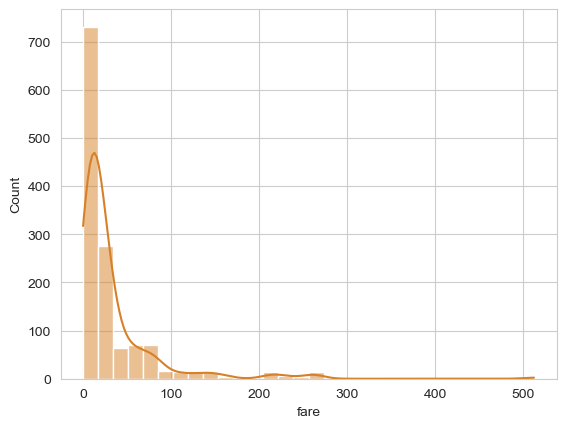

In [26]:
sns.histplot(df.fare, bins=30, kde=True, color='#d68127')

<Axes: xlabel='fare'>

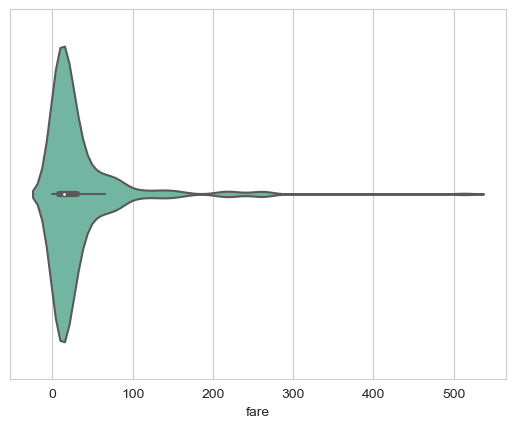

In [27]:
sns.violinplot(x='fare', data=df, palette='Set2')

There is too mich outliers in this feature which shows mostly people pay 7 to 13 dollar which also confirm our middle class family prediction.

#### 2.10 CABIN

In [28]:
df.cabin.value_counts()

cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F4                 4
F33                4
B96 B98            4
D                  4
C22 C26            4
F2                 4
C78                4
E101               3
B58 B60            3
E34                3
C101               3
B51 B53 B55        3
A34                3
D17                2
C124               2
D19                2
D21                2
B28                2
B5                 2
E50                2
B18                2
E46                2
B69                2
C83                2
D33                2
C106               2
D10 D12            2
C125               2
C92                2
C123               2
B41                2
D28                2
C65                2
D30                2
C126               2
E121               2
F G73              2
F G63              2
C80                2
C32                2
D26                2
D37                2
C68                2
E67                2
D36    

This the cabin name which i think not necessary to visualize.

#### 2.11 EMBARKED

EMBARKED represents the C = Cherbourg, Q = Queenstown,S = Southampton

In [29]:
df.embarked.value_counts()

embarked
S    914
C    270
Q    123
Name: count, dtype: int64

<Axes: xlabel='embarked', ylabel='count'>

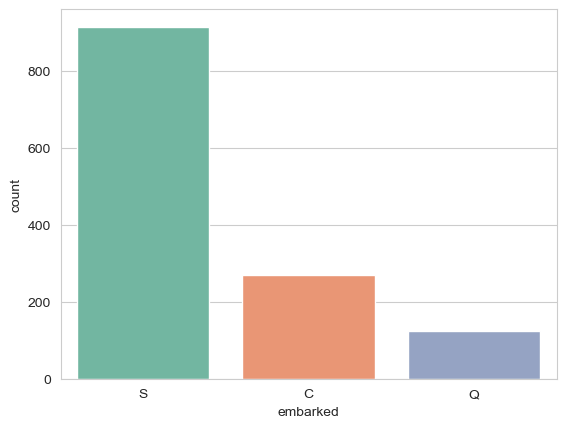

In [30]:
sns.countplot(x=df.embarked, palette='Set2')

So that's all from our univariate analysis and now we start bivariate analysis.

### 3 Bivariate Analysis

Our target variable is SURVIVED so we do our bivariate analysis with this feature.

#### 3.1 Survived VS. Pclass

In [31]:
df.groupby(['survived', 'pclass',])['survived'].agg(['count'])

count
survived pclass       
0.0      1.0       123
         2.0       158
         3.0       528
1.0      1.0       200
         2.0       119
         3.0       181

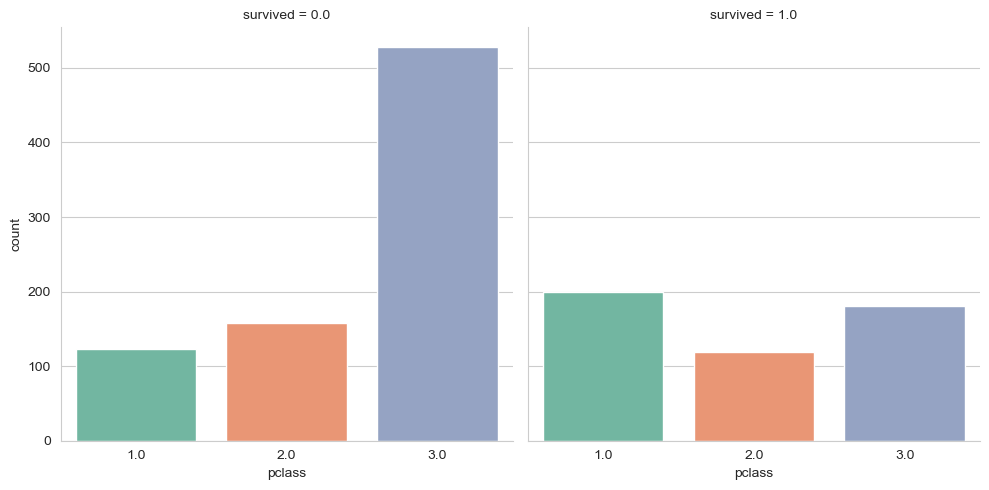

In [32]:
sns.catplot(x='pclass', col='survived', kind='count', data=df, palette='Set2')

Mostly people survived in titanic are from 1st class ticket holder let's check the gender equality.

#### 3.2 Sex VS. Survived

In [33]:
df.groupby(['survived', 'sex'])['survived'].agg(['count'])

count
survived sex          
0.0      female    127
         male      682
1.0      female    339
         male      161

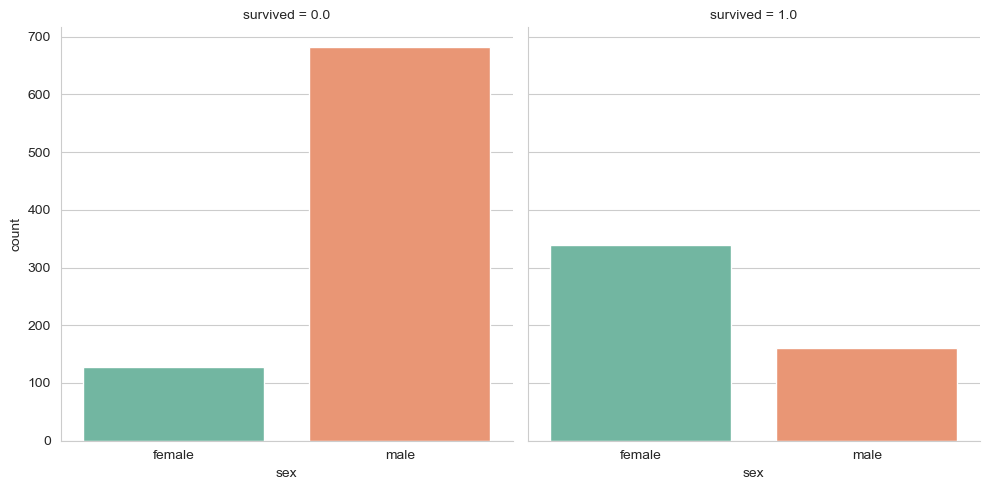

In [34]:
sns.catplot(x='sex', col='survived', kind='count', data=df, palette='Set2')

#### 3.3 Age VS. Survived

In [35]:
bins = [0, 20, 30, 40, 50, 60, 70, 80]

age_groups = pd.cut(df['age'], bins=bins)

result = df.groupby(['survived', age_groups], observed=False)['survived'].agg(['count']).reset_index()

print(result)

    survived       age  count
0        0.0   (0, 20]    134
1        0.0  (20, 30]    227
2        0.0  (30, 40]    121
3        0.0  (40, 50]     80
4        0.0  (50, 60]     32
5        0.0  (60, 70]     21
6        0.0  (70, 80]      4
7        1.0   (0, 20]    114
8        1.0  (20, 30]    134
9        1.0  (30, 40]     89
10       1.0  (40, 50]     52
11       1.0  (50, 60]     30
12       1.0  (60, 70]      6
13       1.0  (70, 80]      2


c:\Users\Ali Abdullah\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Ali Abdullah\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='age', ylabel='count'>

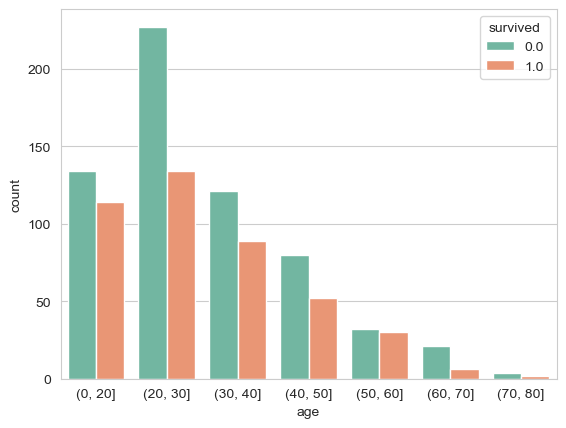

In [36]:
result['survived'] = result['survived'].astype(str)
sns.barplot(x='age', y='count', hue='survived', data=result, palette='Set2')

In [37]:
from scipy.stats import chi2_contingency

age_groups = pd.cut(df['age'], bins=bins, labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(age_groups, df['survived'])

# Perform chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 10.564574415204476
P-value: 0.10280263589519767
Degrees of freedom: 6
Expected frequencies:
 [[146.76099426 101.23900574]
 [213.63193117 147.36806883]
 [124.27342256  85.72657744]
 [ 78.11472275  53.88527725]
 [ 36.69024857  25.30975143]
 [ 15.97801147  11.02198853]
 [  3.55066922   2.44933078]]


#### 3.4 Sibsp VS. Survived

In [38]:
s_result = df.groupby(['survived', 'sibsp'])['survived'].agg(['count']).reset_index()
s_result

,survived,sibsp,count
0,0.0,0.0,582
1,0.0,1.0,156
2,0.0,2.0,23
3,0.0,3.0,14
4,0.0,4.0,19
5,0.0,5.0,6
6,0.0,8.0,9
7,1.0,0.0,309
8,1.0,1.0,163
9,1.0,2.0,19


<Axes: xlabel='sibsp', ylabel='count'>

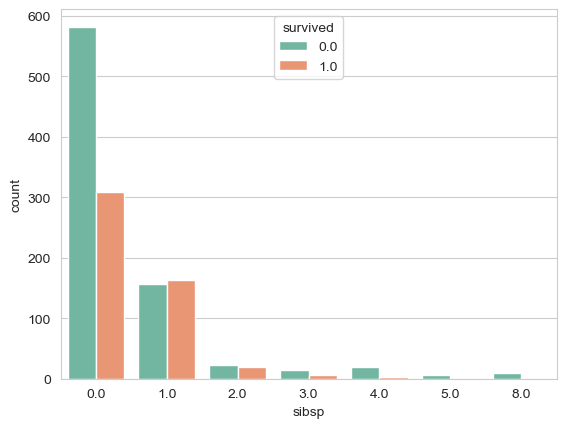

In [39]:
s_result['survived'] = s_result['survived'].astype(str)
sns.barplot(x='sibsp', y='count', hue='survived', data=s_result, palette='Set2')

#### 3.5 Parch VS. Survived

In [40]:
p_result = df.groupby(['survived', 'parch'])['survived'].agg(['count']).reset_index()
p_result

,survived,parch,count
0,0.0,0.0,666
1,0.0,1.0,70
2,0.0,2.0,56
3,0.0,3.0,3
4,0.0,4.0,5
5,0.0,5.0,5
6,0.0,6.0,2
7,0.0,9.0,2
8,1.0,0.0,336
9,1.0,1.0,100


<Axes: xlabel='parch', ylabel='count'>

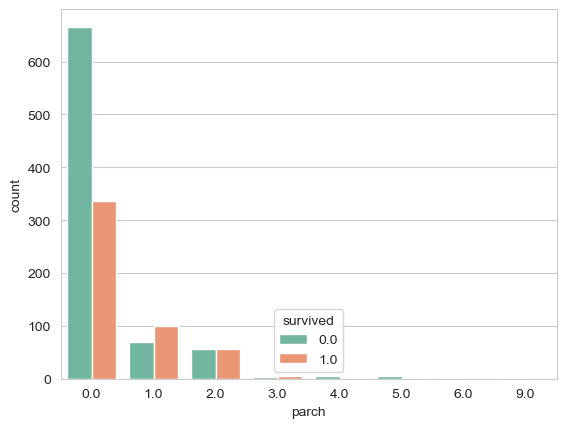

In [41]:
p_result['survived'] = p_result['survived'].astype(str)
sns.barplot(x='parch', y='count', hue='survived', data=p_result, palette='Set2')

#### Embarked VS. Survived

In [42]:
e_result = df.groupby(['survived','embarked'])['survived'].agg(['count']).reset_index()
e_result

,survived,embarked,count
0,0.0,C,120
1,0.0,Q,79
2,0.0,S,610
3,1.0,C,150
4,1.0,Q,44
5,1.0,S,304


<Axes: xlabel='embarked', ylabel='count'>

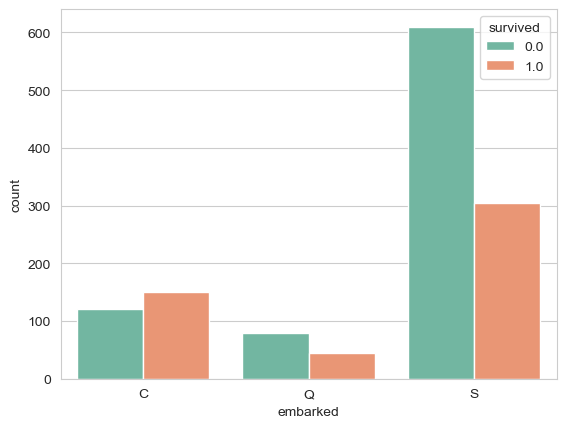

In [43]:
e_result['survived'] = e_result['survived'].astype(str)
sns.barplot(x='embarked', y='count', hue='survived', data=e_result, palette='Set2')

### 4 Survival Analysis:

#### a. What factors influenced the likelihood of survival?

C:\Users\Ali Abdullah\AppData\Local\Temp\ipykernel_29400\1164684585.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['survived', 'sex', 'embarked', 'pclass', 'age_group'])['survived'].count().reset_index(name='Count')
c:\Users\Ali Abdullah\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Ali Abdullah\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observ

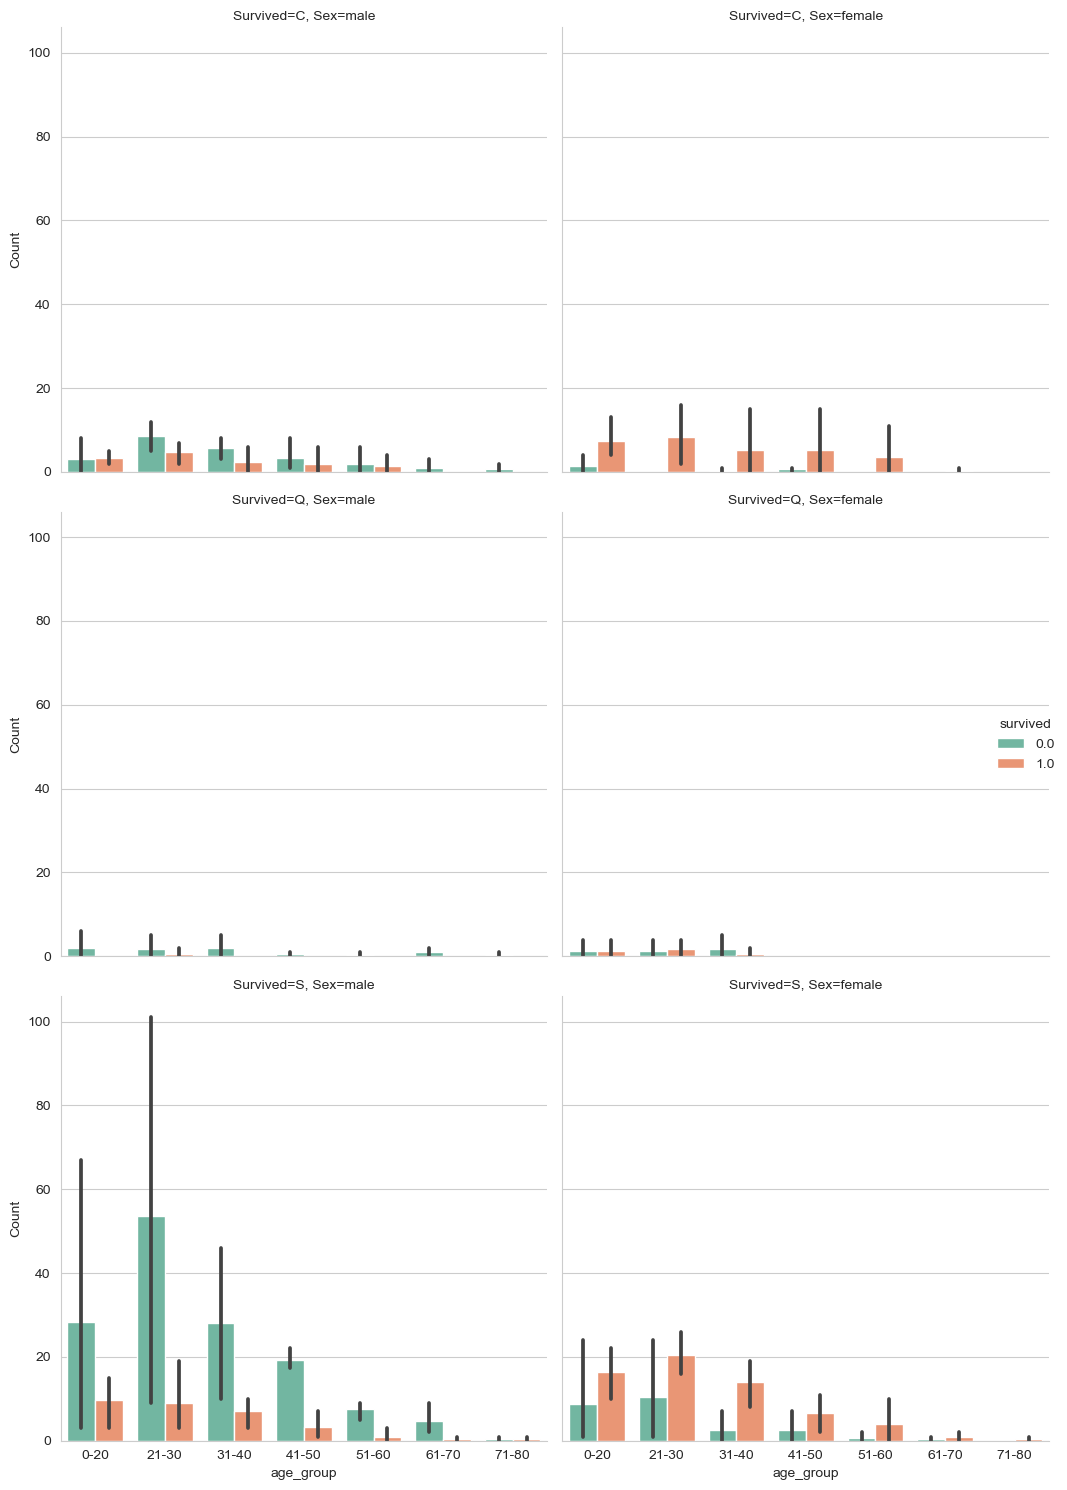

In [44]:
# Discretize 'Age' into age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

# Group by multiple variables and calculate the count of 'Survived'
grouped_data = df.groupby(['survived', 'sex', 'embarked', 'pclass', 'age_group'])['survived'].count().reset_index(name='Count')
grouped_data['survived'] = grouped_data['survived'].astype(str)
# Create facet grid with bar plots
g = sns.catplot(x='age_group', y='Count', hue='survived', col='sex', row='embarked', col_order=['male', 'female'],
                data=grouped_data, kind='bar', palette='Set2')

# Add titles
g.set_titles("Survived={row_name}, Sex={col_name}")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [45]:
df.groupby('sex')['survived'].mean()

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

In [46]:
# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(df['sex'], df['survived'])

# Perform chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 363.6179084388249
P-value: 4.589924936952945e-81
Degrees of freedom: 1
Expected frequencies:
 [[288.00152788 177.99847212]
 [520.99847212 322.00152788]]


In [47]:
from scipy.stats import pointbiserialr
# Convert 'Sex' to numerical (0 for male, 1 for female)
sex_corr = df['sex'].map({'male': 0, 'female': 1})

# Calculate point-biserial correlation coefficient
corr_coefficient, p_value = pointbiserialr(sex_corr.dropna(), df['survived'].dropna())

print("Point-Biserial Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.5286930913889881
P-value: 3.775892357945557e-95


In [48]:
df.groupby(['survived', 'sex', 'pclass'])['survived'].agg(['count'])

count
survived sex    pclass       
0.0      female 1.0         5
                2.0        12
                3.0       110
         male   1.0       118
                2.0       146
                3.0       418
1.0      female 1.0       139
                2.0        94
                3.0       106
         male   1.0        61
                2.0        25
                3.0        75

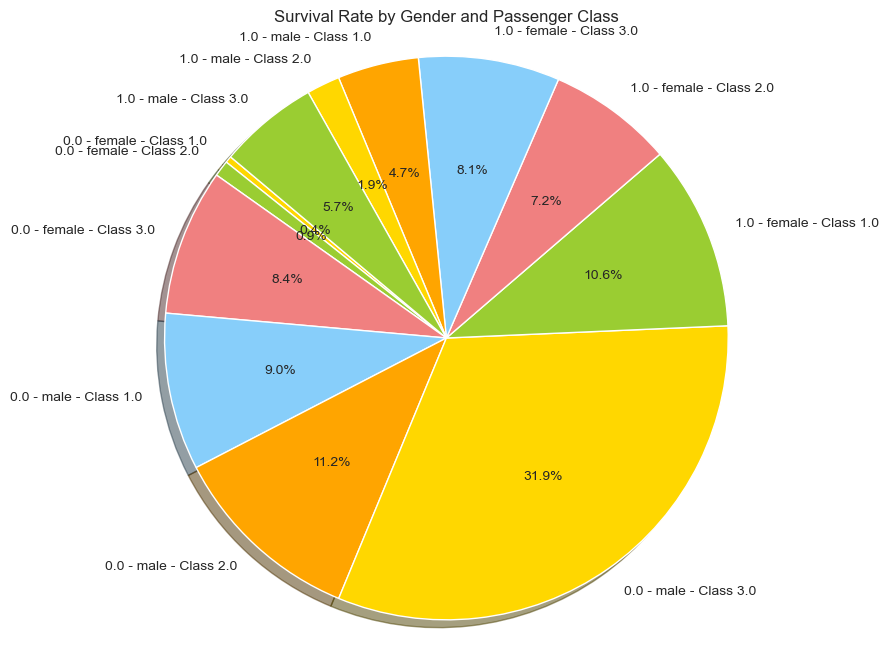

In [49]:
grouped_data = df.groupby(['survived', 'sex', 'pclass'])['survived'].agg(['count']).reset_index()

total_count = grouped_data['count'].sum()
grouped_data['percentage'] = grouped_data['count']/total_count*100

labels = grouped_data.apply(lambda row: f"{row['survived']} - {row['sex']} - Class {row['pclass']}", axis=1)
sizes = grouped_data['percentage']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Survival Rate by Gender and Passenger Class')
plt.show()

In [50]:
df.groupby(['survived', 'sex', 'embarked'])['survived'].agg(['count'])

count
survived sex    embarked       
0.0      female C            11
                Q            23
                S            93
         male   C           109
                Q            56
                S           517
1.0      female C           102
                Q            37
                S           198
         male   C            48
                Q             7
                S           106

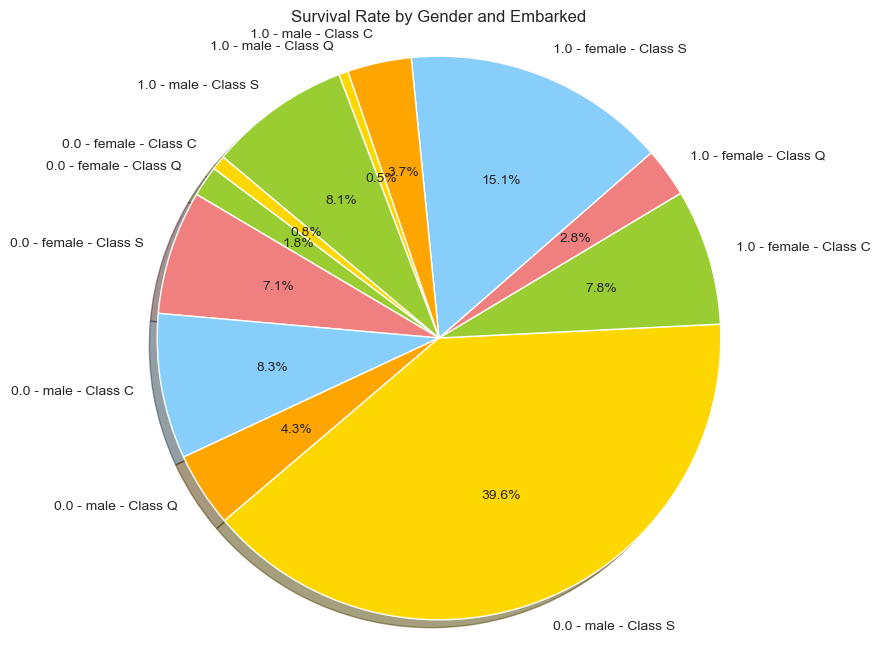

In [51]:
grouped_data = df.groupby(['survived', 'sex', 'embarked'])['survived'].agg(['count']).reset_index()

total_count = grouped_data['count'].sum()
grouped_data['percentage'] = grouped_data['count']/total_count*100

labels = grouped_data.apply(lambda row: f"{row['survived']} - {row['sex']} - Class {row['embarked']}", axis=1)
sizes = grouped_data['percentage']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Survival Rate by Gender and Embarked')
plt.show()

#### b.	Did gender play a role in survival rates?

In [52]:
survival_rate = df.groupby(['survived','sex'])['survived'].agg(['count'])
survival_rate

count
survived sex          
0.0      female    127
         male      682
1.0      female    339
         male      161

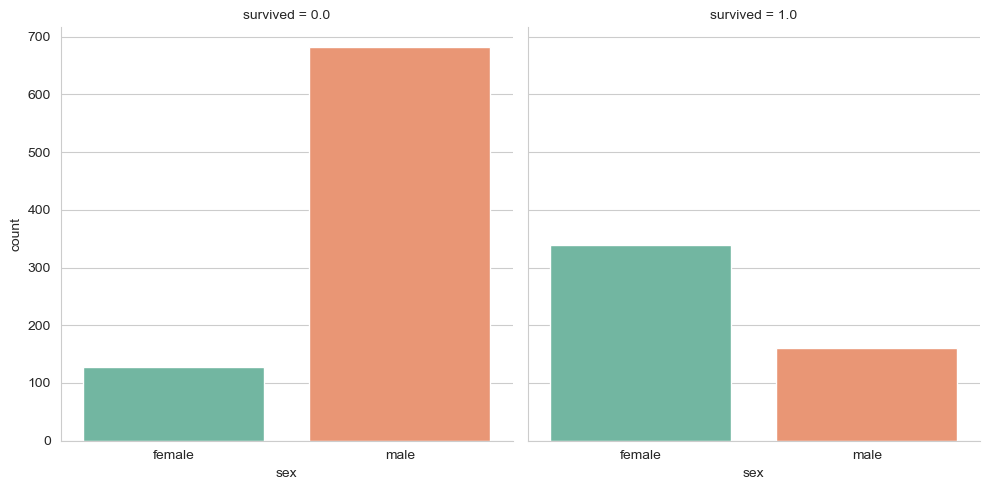

In [53]:
sns.catplot(x='sex', col='survived', kind='count', data=df, palette='Set2')

As you can see gender play a role in survival rate because mostly people who survived on titanic was female.

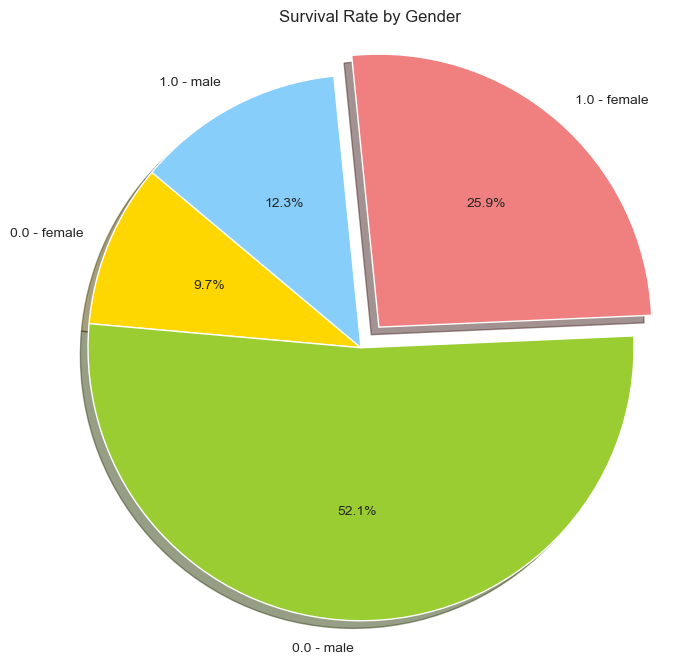

In [54]:
grouped_data = df.groupby(['survived', 'sex'])['survived'].agg(['count']).reset_index()

total_count = grouped_data['count'].sum()
grouped_data['percentage'] = grouped_data['count']/total_count*100

labels = grouped_data.apply(lambda row: f"{row['survived']} - {row['sex']}", axis=1)
sizes = grouped_data['percentage']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']
explode = (0, 0, 0.1, 0)  # explode 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Survival Rate by Gender')
plt.show()

25.9 % females were survived on titanic

#### c.	Did age or passenger class affect survival rates?

In [55]:
bins = [0, 20, 30, 40, 50, 60, 70, 80]
age_groups = pd.cut(df['age'], bins=bins)
result = df.groupby(['survived', age_groups, 'pclass'], observed=False)['survived'].agg(['count'])

print(result)

                          count
survived age      pclass       
0.0      (0, 20]  1.0         5
                  2.0        16
                  3.0       113
         (20, 30] 1.0        19
                  2.0        62
                  3.0       146
         (30, 40] 1.0        19
                  2.0        33
                  3.0        69
         (40, 50] 1.0        30
                  2.0        18
                  3.0        32
         (50, 60] 1.0        15
                  2.0        12
                  3.0         5
         (60, 70] 1.0        13
                  2.0         5
                  3.0         3
         (70, 80] 1.0         2
                  2.0         0
                  3.0         2
1.0      (0, 20]  1.0        21
                  2.0        39
                  3.0        54
         (20, 30] 1.0        44
                  2.0        39
                  3.0        51
         (30, 40] 1.0        47
                  2.0        22
        

In [61]:
result = result.reset_index()

c:\Users\Ali Abdullah\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Ali Abdullah\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Ali Abdullah\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and si

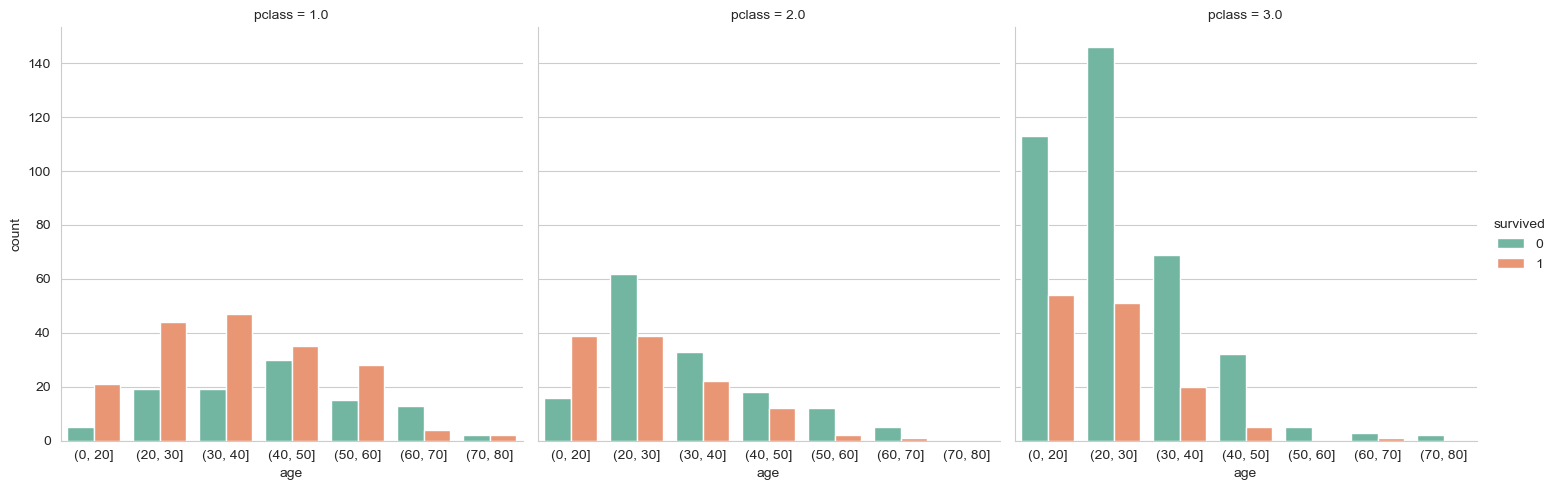

In [65]:
result['survived'] = result['survived'].astype(str)
sns.catplot(x='age', y='count', hue='survived', col='pclass', data=result, kind='bar', palette='Set2')

According to this chart 3rd class people are more survived than other classes.

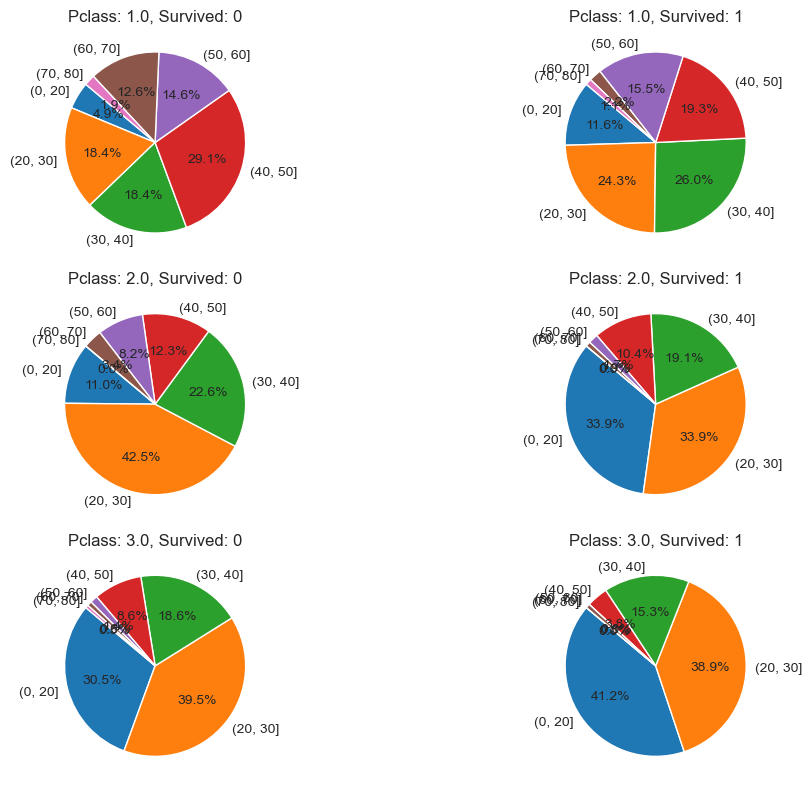

In [66]:
fig, axes = plt.subplots(nrows=len(result['pclass'].unique()), ncols=len(result['survived'].unique()), figsize=(12, 8))

# Iterate over each combination of 'pclass' and 'survived'
for i, pclass in enumerate(result['pclass'].unique()):
    for j, survived in enumerate(result['survived'].unique()):
        # Filter the data for the current 'pclass' and 'survived' combination
        data = result[(result['pclass'] == pclass) & (result['survived'] == survived)]
        
        # Calculate percentages
        percentages = data['count'] / data['count'].sum() * 100
        
        # Plot pie chart
        axes[i, j].pie(percentages, labels=data['age'], autopct='%1.1f%%', startangle=140)
        axes[i, j].set_title(f'Pclass: {pclass}, Survived: {survived}')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [69]:
len(df[df['age']<30])

569